# Visualizations in R

Author: Sandra Silva
Date: 13/07/2020 \
Version: 0.3 \

In [1]:
library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(vegan)
library("factoextra")
library(RColorBrewer)
library("FactoMineR")

Loading required package: grid

ComplexHeatmap version 2.5.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.10
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


── Attaching packages ─────────────────────────────────────── t

In [27]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)}

The ComplexHeatmap package is inspired from the pheatmap package. You can find many arguments in ComplexHeatmap have the same names as in pheatmap. 
https://jokergoo.github.io/ComplexHeatmap-reference/book/

# Load data

In [2]:
data <- read.csv("/home/gomes/silva/Correct_datasets/Mean_FS_byGenus/Cazyme_counts_PA_mean_family_genus.csv", header=T, row.names="Genus")
data_matrix <- data[ , !names(data) %in% c("orfs", "index","Origin","Genus", "Family")]
data_matrix <- as.matrix(data_matrix)
data_matrix_transpose <- t(data_matrix)
data_matrix_transpose <- as.matrix(data_matrix_transpose)
#head(data_matrix_transpose)
data_hellinger <- decostand(data_matrix, method="hellinger")

head(data_matrix)

,GH25,GH13_5,GH23,GT35,GH113,GT83,GT2_Glyco_tranf_2_3,CBM48.GH13_9,CE4,GH15,⋯,GH0,GH88,PL8_3,GH23.CBM50,GH32,GT0,GH33,GT27,GH149,GH13_8
Aequorivita,0.0000000,0,0.9318182,0.00000000,0.7500000,0.70454545,0.8409091,0.0000000,0.8409091,0.0,⋯,0.04545455,0.0000000,0,0.90909091,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0
Aquimarina,0.0000000,0,0.9736842,0.00000000,0.8684211,0.05263158,0.8947368,0.9210526,0.0000000,0.5,⋯,0.07894737,0.1842105,0,0.50000000,0.02631579,0.0000000,0.0000000,0.89473684,0.02631579,0
Arenibacter,0.0000000,0,0.9500000,0.55000000,1.0000000,1.00000000,0.9500000,0.9000000,0.7500000,1.0,⋯,0.90000000,0.7500000,0,0.80000000,0.85000000,0.1500000,1.0000000,0.05000000,0.00000000,0
BACL21,0.0000000,0,0.8571429,0.00000000,0.4761905,0.80952381,1.0000000,0.4761905,0.0000000,0.0,⋯,0.00000000,0.0000000,0,0.47619048,0.90476190,0.0952381,0.0000000,0.04761905,0.33333333,0
Capnocytophaga,0.6818182,0,1.0000000,0.01515152,0.0000000,0.00000000,1.0000000,0.0000000,0.8181818,0.0,⋯,0.39393939,0.0000000,0,0.04545455,0.03030303,0.0000000,0.8636364,0.66666667,0.00000000,1
Cellulophaga,0.0000000,0,1.0000000,0.00000000,1.0000000,0.63157895,1.0000000,0.5263158,0.0000000,1.0,⋯,0.52631579,0.2105263,0,0.00000000,0.42105263,0.1578947,0.0000000,0.63157895,0.05263158,0


In [29]:
#largura, altura:
fig(8, 8)
set.seed(40)
svg(file="cazymes_per_genus.svg")
#pdf(file = "Cazymes_PA_clan_mean_family_genus.pdf",  width = 10, height = 8, onefile=FALSE)


library("RColorBrewer")
mycol <- colorRampPalette(brewer.pal(9, "YlOrRd"))(20)

metadata <- data.frame(data$Family)
colnames(metadata) <- c('Family')
colours <- list('Family' = c('Flavobacteriaceae' = '#3274a1','Weeksellaceae' = '#e1812c'))


row_ha = HeatmapAnnotation(df = metadata, 
                           col=colours, 
                           show_legend = TRUE,
                           which = 'col',
                           simple_anno_size = unit(0.3, "cm"),
                           annotation_name_gp = gpar(fontsize = 6),
                           annotation_legend_param = list(title_gp = gpar(fontsize = 8,  fontface = "bold"), 
                                                          labels_gp = gpar(fontsize = 8)))


hmap <- Heatmap(as.matrix(data_matrix_transpose),
                name = "Mean Presence per Genus",
                col = mycol,
                border=TRUE,
    
    use_raster = TRUE, 
    raster_device = "png",   
                
    #width = unit(15, "cm"), 
    #height = unit(22, "cm"),
    #heatmap_width = unit(17, "cm"), 
    heatmap_height = unit(17, "cm"),

    row_km = 7, row_km_repeats = 100,
    column_km = 6, column_km_repeats = 100,
                               
    column_title = "Genus", column_title_side = "bottom",  
    column_title_gp=gpar(fontsize = 8, fontface = "bold"),
    
    row_title = "Clans", row_title_side="right",
    row_title_gp=gpar(fontsize = 8, fontface = "bold"),
                       
    row_names_gp = gpar(fontsize = 7),
    column_names_gp = gpar(fontsize = 6),
    
    show_row_names = TRUE,
    show_column_names = TRUE,
    
    #column_names_rot = 45,
    
    cluster_rows = TRUE,
    cluster_columns = TRUE,           
               
    top_annotation=row_ha,  

    heatmap_legend_param = list(title_gp = gpar(fontsize = 8, fontface = "bold" ), labels_gp = gpar(fontsize = 8),
                                direction = "horizontal", legend_width = unit(3.2, "cm"), labels = c("0%", "50%", "100%"))
)

#png(file="ht_list.png")

#map= 
draw(hmap, merge_legend = TRUE)#bottom", annotation_legend_side = "bottom")
dev.off()


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

In [4]:
dev.off()

null device 
          1

# PCAs

In [5]:
data$Genus <- rownames(data)

In [6]:
head(data)

,Family,GH25,GH13_5,GH23,GT35,GH113,GT83,GT2_Glyco_tranf_2_3,CBM48.GH13_9,CE4,⋯,GH88,PL8_3,GH23.CBM50,GH32,GT0,GH33,GT27,GH149,GH13_8,Genus
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aequorivita,Flavobacteriaceae,"0,0000000",0,"0,9318182","0,00000000","0,7500000","0,70454545","0,8409091","0,0000000","0,8409091",⋯,"0,0000000",0,"0,90909091","0,00000000","0,0000000","0,0000000","0,00000000","0,00000000",0,Aequorivita
Aquimarina,Flavobacteriaceae,"0,0000000",0,"0,9736842","0,00000000","0,8684211","0,05263158","0,8947368","0,9210526","0,0000000",⋯,"0,1842105",0,"0,50000000","0,02631579","0,0000000","0,0000000","0,89473684","0,02631579",0,Aquimarina
Arenibacter,Flavobacteriaceae,"0,0000000",0,"0,9500000","0,55000000","1,0000000","1,00000000","0,9500000","0,9000000","0,7500000",⋯,"0,7500000",0,"0,80000000","0,85000000","0,1500000","1,0000000","0,05000000","0,00000000",0,Arenibacter
BACL21,Flavobacteriaceae,"0,0000000",0,"0,8571429","0,00000000","0,4761905","0,80952381","1,0000000","0,4761905","0,0000000",⋯,"0,0000000",0,"0,47619048","0,90476190","0,0952381","0,0000000","0,04761905","0,33333333",0,BACL21
Capnocytophaga,Flavobacteriaceae,"0,6818182",0,"1,0000000","0,01515152","0,0000000","0,00000000","1,0000000","0,0000000","0,8181818",⋯,"0,0000000",0,"0,04545455","0,03030303","0,0000000","0,8636364","0,66666667","0,00000000",1,Capnocytophaga
Cellulophaga,Flavobacteriaceae,"0,0000000",0,"1,0000000","0,00000000","1,0000000","0,63157895","1,0000000","0,5263158","0,0000000",⋯,"0,2105263",0,"0,00000000","0,42105263","0,1578947","0,0000000","0,63157895","0,05263158",0,Cellulophaga


In [7]:
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

In [8]:
get_plot <- function(data_FS, data_matrix_FS, files) {
    set_plot_dimensions(8, 7)
    data_matrix_FS.pr <- prcomp(as.matrix(data_matrix_FS), center = TRUE) #scale = TRUE

    n <- 40
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    #pie(rep(1,n), col=sample(col_vector, n))

    fviz_pca_ind(data_matrix_FS.pr, geom.ind = c("point","text"), 
                 pointshape = 21, pointsize = 2, 
                 label = "ind", labelsize = 3,
                 fill.ind = data_FS$Genus, col.ind = "black", 
                 palette = col_vector, #"jco", 
                 #addEllipses = TRUE, # two few points - we're using means
                 col.var = "black",
                 repel = TRUE, # Avoid text overlapping (like Jitter - deprecated)
                 legend.title = "Genus") +
      
    ggtitle("PCA") +
    theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")                  
}

In [9]:
get_plot_Family <- function(data_FS, data_matrix_FS, files) {
    set_plot_dimensions(4, 3)
    data_matrix_FS.pr <- prcomp(as.matrix(data_matrix_FS), center = TRUE) #scale = TRUE

    n <- 40
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    #pie(rep(1,n), col=sample(col_vector, n))

    fviz_pca_ind(data_matrix_FS.pr, geom.ind = c("point"), 
                 pointshape = 21, pointsize = 2, 
                 fill.ind = data_FS$Family, col.ind = "black", 
                 palette = col_vector, #"jco", 
                 #addEllipses = TRUE, # two few points - we're using means
                 col.var = "black",
                 repel = TRUE, # Avoid text overlapping (like Jitter - deprecated)
                 legend.title = "Family") +
    
    ggtitle("PCA") +
    theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")                  
}

In [10]:
get_plots_Metrics <- function(data_matrix_FS, x) {
    set_plot_dimensions(4, 2)

    #Principal component analysis
    library("FactoMineR")
    res.pca <- PCA(data_matrix_FS,  graph = FALSE)

    # Visualize eigenvalues/variances
    c <- fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50)) +
    ggtitle("eigenvalues/variances") +
      theme(plot.title = element_text(hjust = 0.5))

    # Contributions of variables to PC1
    d <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
    # Contributions of variables to PC2
    e <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
    
    plot(c)
    plot(d)
    plot(e)
}

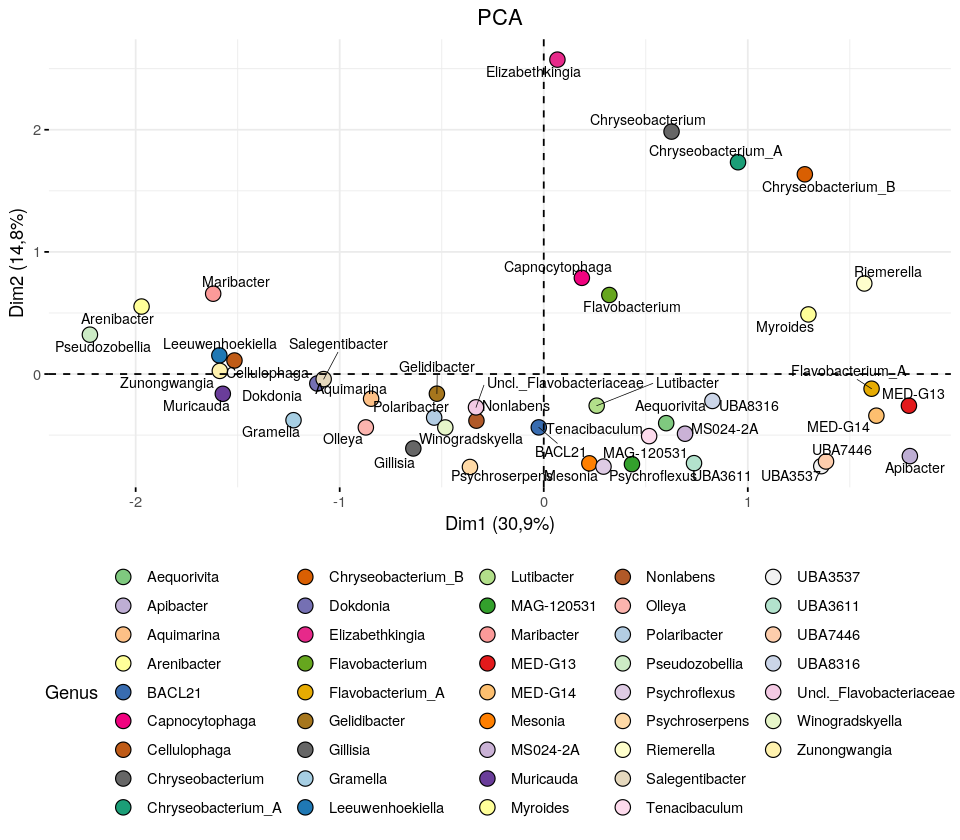

In [11]:
get_plot(data, data_matrix, x) 

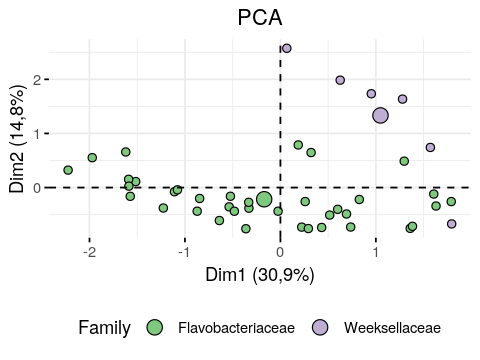

In [12]:
get_plot_Family(data, data_matrix, x) 

# Permanova

In [13]:
# PerMANOVA - partitioning the euclidean distance matrix by FAMILY
adonis(data_matrix ~ Family, data = data, method='eu')

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
adonis(formula = data_matrix ~ Family, data = data, method = "eu") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Family     1    21,406 21,4060  5,7644 0,12326  0,001 ***
Residuals 41   152,253  3,7135         0,87674           
Total     42   173,659                 1,00000           
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

In [14]:
#PerMANOVA - partitioning the euclidean distance matrix by GENUS
adonis(data_matrix ~ Genus, data = data, method='eu')

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
adonis(formula = data_matrix ~ Genus, data = data, method = "eu") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model R2 Pr(>F)
Genus     42    173,66       4       0  1      1
Residuals  0      0,00     Inf          0       
Total     42    173,66                  1       

In [15]:
#PerMANOVA - partitioning the euclidean distance matrix by ORIGIN
#adonis(data_matrix ~ Origin, data = data, method='eu')

### With hellinger transformed data

In [16]:
# PerMANOVA - partitioning the euclidean distance matrix by...
# with hellinger transformed data
adonis(data_hellinger  ~ Genus, data = data, method='eu')
adonis(data_hellinger ~ Genus, data = data, method='eu')
#adonis(data_hellinger ~ Origin, data = data, method='eu')

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
adonis(formula = data_hellinger ~ Genus, data = data, method = "eu") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model R2 Pr(>F)
Genus     42    16,163       0       0  1      1
Residuals  0     0,000     Inf          0       
Total     42    16,163                  1       

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
adonis(formula = data_hellinger ~ Genus, data = data, method = "eu") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model R2 Pr(>F)
Genus     42    16,163       0       0  1      1
Residuals  0     0,000     Inf          0       
Total     42    16,163                  1       

# NMDS

Non-metric Multi-dimensional Scaling (NMDS) is a way to condense information from multidimensional data (multiple variables/species/OTUs), into a 2D representation or ordination. In this ordination, the closer two points are, the more similar the corresponding samples are with respect to the variables that went into making the NMDS plot.

NMDS is an iterative algorithm, so it repeats the same series of steps over and over again until it finds the best solution. This is important to note because it means that each time you produce an NMDS plot from scratch it may look slightly different, even when starting with exactly the same data.

In [17]:
set.seed(123)
nmds = metaMDS(data_matrix, distance = "bray")
nmds

Run 0 stress 0,1722038 
Run 1 stress 0,1721958 
... New best solution
... Procrustes: rmse 0,003048951  max resid 0,01186677 
Run 2 stress 0,1823631 
Run 3 stress 0,1904719 
Run 4 stress 0,1721959 
... Procrustes: rmse 6,50581e-05  max resid 0,0002172327 
... Similar to previous best
Run 5 stress 0,1868084 
Run 6 stress 0,1715654 
... New best solution
... Procrustes: rmse 0,06664818  max resid 0,3531597 
Run 7 stress 0,1726476 
Run 8 stress 0,1751446 
Run 9 stress 0,1757784 
Run 10 stress 0,1719114 
... Procrustes: rmse 0,02306148  max resid 0,08586282 
Run 11 stress 0,1721961 
Run 12 stress 0,1904871 
Run 13 stress 0,1721482 
Run 14 stress 0,1719184 
... Procrustes: rmse 0,02419404  max resid 0,08440319 
Run 15 stress 0,1706421 
... New best solution
... Procrustes: rmse 0,05183395  max resid 0,2657525 
Run 16 stress 0,1721962 
Run 17 stress 0,1706433 
... Procrustes: rmse 0,000378216  max resid 0,00205849 
... Similar to previous best
Run 18 stress 0,1895375 
Run 19 stress 0,1846118


Call:
metaMDS(comm = data_matrix, distance = "bray") 

global Multidimensional Scaling using monoMDS

Data:     data_matrix 
Distance: bray 

Dimensions: 2 
Stress:     0,1706421 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘data_matrix’ 


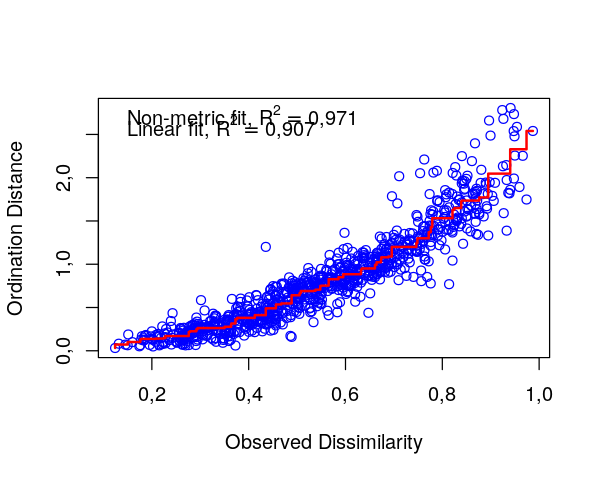

In [18]:
set_plot_dimensions(5, 4)
stressplot(nmds)

In [19]:
data.scores = as.data.frame(scores(nmds))
data.scores$Genus = data$Genus
data.scores$Family = data$Family
data.scores$Origin = data$Origin

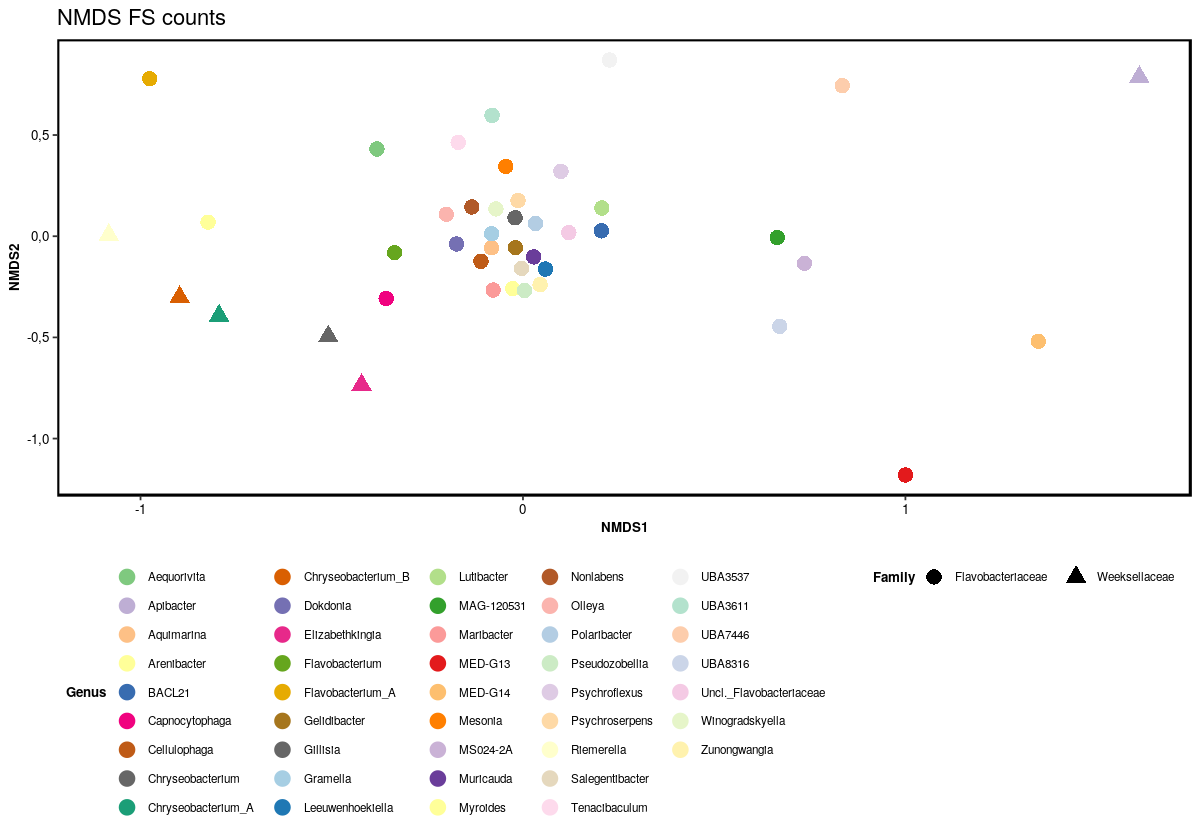

In [20]:
set_plot_dimensions(10, 7)

n <- 50
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
#pie(rep(1,n), col=sample(col_vector, n))

library(ggplot2)

xx = ggplot(data.scores, aes(x = NMDS1, y = NMDS2)) + 
    geom_point(size = 4, aes( shape = Family, colour = Genus))+ 
    theme(axis.text.y = element_text(colour = "black", size = 8), 
    axis.text.x = element_text(colour = "black",  size = 8), 
    legend.text = element_text(size = 7, colour ="black"), 
    legend.position = "right", axis.title.y = element_text(face = "bold", size = 8), 
    axis.title.x = element_text(face = "bold", size = 8, colour = "black"), 
    legend.title = element_text(size = 8, colour = "black", face = "bold"), 
    panel.background = element_blank(), panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank()) + 
    labs(x = "NMDS1", colour = "Genus", y = "NMDS2", shape = "Family")  + 
    scale_colour_manual(values = col_vector) +
    ggtitle("NMDS FS counts") +
      theme(legend.position="bottom")
 
xx
    
#ggsave("NMDS.svg")